In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import matplotlib
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import joblib

In [3]:
df_train = pd.read_csv('../../data/application_train.csv')
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [5]:
df_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

<Axes: xlabel='TARGET'>

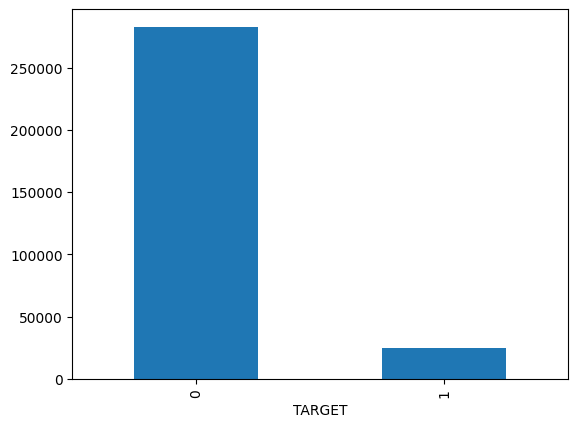

In [9]:
df_train['TARGET'].value_counts().plot(kind='bar')

### Target variable 1 - client with payment difficulties: he/she had late payment

## PREPROCESSING

In [15]:
df_train['NAME_CONTRACT_TYPE'].value_counts()

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

In [14]:
df_train[df_train['TARGET'].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


### FIND CORRELEATION BETWEEN COLUMNS

In [16]:
# df_train.corr()['TARGET']

### TRAIN

In [21]:
df_train = df_train.dropna()
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,Cash loans,M,Y,N,0,162000.0,263686.5,24781.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,Cash loans,M,Y,N,1,225000.0,1019205.0,31032.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,456083,0,Cash loans,F,Y,Y,2,112500.0,361462.5,16051.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307359,456084,0,Cash loans,F,Y,Y,1,99000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307407,456140,1,Cash loans,F,Y,Y,1,261000.0,711454.5,47673.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
307456,456195,0,Cash loans,F,Y,Y,0,94500.0,270000.0,15075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [18]:
len(df_train)

307511

In [19]:
307511 - 8602

298909

In [22]:
df_train['TARGET'].value_counts()

TARGET
0    8076
1     526
Name: count, dtype: int64

In [ ]:
df_target_0 = df_train[df_train['TARGET'] == 0]
df_target_0

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,Cash loans,M,Y,N,0,162000.0,263686.5,24781.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
296,100341,0,Cash loans,M,Y,Y,0,76500.0,545040.0,20677.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307215,455923,0,Cash loans,M,Y,N,0,157500.0,225000.0,15034.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307358,456083,0,Cash loans,F,Y,Y,2,112500.0,361462.5,16051.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307359,456084,0,Cash loans,F,Y,Y,1,99000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307456,456195,0,Cash loans,F,Y,Y,0,94500.0,270000.0,15075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [ ]:
df_target_0 = df_target_0.sample(frac=1)
df_target_0

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
302382,450329,0,Cash loans,F,Y,Y,0,225000.0,1078200.0,38331.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
70741,182055,0,Cash loans,M,Y,Y,0,157500.0,1123443.0,32976.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
259490,400301,0,Cash loans,M,Y,N,2,247500.0,1288350.0,35428.5,...,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
64612,174933,0,Cash loans,F,Y,Y,0,225000.0,848745.0,46174.5,...,0,0,0,0,0.0,0.0,1.0,0.0,1.0,2.0
151060,275102,0,Revolving loans,M,Y,N,0,157500.0,202500.0,10125.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237130,374659,0,Cash loans,M,Y,N,0,315000.0,1024740.0,49428.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
127764,248181,0,Cash loans,M,Y,N,1,270000.0,143910.0,14364.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
145885,269151,0,Cash loans,F,Y,Y,0,360000.0,731353.5,57910.5,...,0,0,0,0,1.0,0.0,0.0,0.0,1.0,2.0
179550,308066,0,Cash loans,F,Y,Y,0,135000.0,1170000.0,49702.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0


In [29]:
df_target_0 = df_target_0.iloc[:2000]
df_target_0

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
302382,450329,0,Cash loans,F,Y,Y,0,225000.0,1078200.0,38331.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
70741,182055,0,Cash loans,M,Y,Y,0,157500.0,1123443.0,32976.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
259490,400301,0,Cash loans,M,Y,N,2,247500.0,1288350.0,35428.5,...,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
64612,174933,0,Cash loans,F,Y,Y,0,225000.0,848745.0,46174.5,...,0,0,0,0,0.0,0.0,1.0,0.0,1.0,2.0
151060,275102,0,Revolving loans,M,Y,N,0,157500.0,202500.0,10125.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296530,443548,0,Cash loans,F,Y,N,0,225000.0,540000.0,27702.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
232883,369729,0,Revolving loans,M,Y,Y,0,351000.0,270000.0,13500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
165054,291338,0,Cash loans,M,Y,Y,1,135000.0,918000.0,33102.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
200712,332660,0,Cash loans,M,Y,Y,0,225000.0,450000.0,27324.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0


In [35]:
df_rest = df_train[df_train['TARGET'] == 1]
df_rest

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
255,100295,1,Cash loans,M,Y,N,1,225000.0,1019205.0,31032.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0
492,100567,1,Revolving loans,M,Y,Y,0,99000.0,180000.0,9000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0
765,100879,1,Cash loans,F,Y,Y,0,450000.0,1323000.0,47650.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
1471,101730,1,Cash loans,F,Y,N,2,90000.0,450000.0,19066.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
1691,101980,1,Cash loans,F,Y,N,0,135000.0,508495.5,26091.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304835,453178,1,Cash loans,M,Y,Y,1,225000.0,220500.0,17806.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0
305640,454115,1,Cash loans,F,Y,N,0,112500.0,557005.5,30348.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,6.0
306452,455053,1,Cash loans,F,Y,Y,2,324000.0,945000.0,30613.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
306957,455629,1,Cash loans,F,Y,Y,2,135000.0,219249.0,16083.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0


In [40]:
df = pd.concat([df_rest, df_target_0], ignore_index=True).sample(frac=1).reset_index(drop=True)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,294084,0,Revolving loans,F,Y,N,0,247500.0,720000.0,36000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
1,123748,0,Cash loans,F,Y,Y,1,292500.0,755190.0,36459.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
2,120656,1,Cash loans,F,Y,Y,1,270000.0,417024.0,18369.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
3,420808,1,Cash loans,M,Y,N,1,315000.0,502186.5,52861.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
4,305897,0,Cash loans,F,Y,Y,1,171000.0,616846.5,45018.0,...,0,0,0,0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2521,326021,1,Cash loans,M,Y,Y,1,225000.0,270000.0,28777.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2522,313094,0,Revolving loans,M,Y,N,2,180000.0,337500.0,16875.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
2523,430967,0,Cash loans,M,Y,Y,1,270000.0,220662.0,26185.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
2524,287441,0,Cash loans,F,Y,Y,0,225000.0,701730.0,71905.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


### TRAIN AND TEST DATA

In [43]:
df_test = pd.read_csv('../../data/application_test.csv')
df_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [45]:
df_test = df_test.dropna()
df_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
15,100107,Cash loans,M,Y,Y,0,180000.0,296280.0,21690.0,225000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
18,100128,Cash loans,F,Y,Y,1,225000.0,431280.0,23526.0,360000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,4.0
73,100561,Cash loans,M,Y,Y,0,180000.0,67500.0,8140.5,67500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
86,100699,Cash loans,M,Y,Y,1,225000.0,323460.0,23134.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
102,100770,Cash loans,M,Y,N,0,202500.0,697500.0,33687.0,697500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48628,455243,Cash loans,F,Y,Y,1,112500.0,252531.0,26005.5,234000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
48670,455607,Cash loans,M,Y,Y,0,387000.0,350415.0,25051.5,292500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,5.0
48682,455703,Cash loans,F,Y,Y,1,450000.0,790830.0,57676.5,675000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48707,455940,Cash loans,M,Y,Y,0,202500.0,225000.0,19242.0,225000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,5.0


In [72]:
def categorical_to_numeric(dataset):
    categorical_cols = dataset.select_dtypes(include=['object', 'category']).columns.tolist()
    le = LabelEncoder()
    for col in categorical_cols:
        dataset[col] = le.fit_transform(dataset[col].astype(str))

In [73]:
categorical_to_numeric(df)

In [74]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,294084,0,1,0,0,0,0,247500.0,720000.0,36000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
1,123748,0,0,0,0,1,1,292500.0,755190.0,36459.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
2,120656,1,0,0,0,1,1,270000.0,417024.0,18369.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
3,420808,1,0,1,0,0,1,315000.0,502186.5,52861.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
4,305897,0,0,0,0,1,1,171000.0,616846.5,45018.0,...,0,0,0,0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2521,326021,1,0,1,0,1,1,225000.0,270000.0,28777.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2522,313094,0,1,1,0,0,2,180000.0,337500.0,16875.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
2523,430967,0,0,1,0,1,1,270000.0,220662.0,26185.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
2524,287441,0,0,0,0,1,0,225000.0,701730.0,71905.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [75]:
categorical_to_numeric(df_test)

/tmp/ipykernel_126009/351646234.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[col] = le.fit_transform(dataset[col].astype(str))
/tmp/ipykernel_126009/351646234.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[col] = le.fit_transform(dataset[col].astype(str))
/tmp/ipykernel_126009/351646234.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [76]:
df_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
15,100107,0,1,0,1,0,180000.0,296280.0,21690.0,225000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
18,100128,0,0,0,1,1,225000.0,431280.0,23526.0,360000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,4.0
73,100561,0,1,0,1,0,180000.0,67500.0,8140.5,67500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
86,100699,0,1,0,1,1,225000.0,323460.0,23134.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
102,100770,0,1,0,0,0,202500.0,697500.0,33687.0,697500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48628,455243,0,0,0,1,1,112500.0,252531.0,26005.5,234000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
48670,455607,0,1,0,1,0,387000.0,350415.0,25051.5,292500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,5.0
48682,455703,0,0,0,1,1,450000.0,790830.0,57676.5,675000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48707,455940,0,1,0,1,0,202500.0,225000.0,19242.0,225000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,5.0


In [77]:
X = df.drop(columns='TARGET')
y = df['TARGET']

In [78]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.33, random_state=123)

In [79]:
xgb_clf = xgb.XGBClassifier(random_state=123)

In [80]:
xgb_clf.set_params(n_estimators=10)
xgb_clf.fit(X_train, y_train)
preds = xgb_clf.predict(X_test)

In [83]:
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]

print("Accuracy:", accuracy)

Accuracy: 0.7889688249400479


In [96]:
preds

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

### TEST DUMMY DATA

In [84]:
df_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
15,100107,0,1,0,1,0,180000.0,296280.0,21690.0,225000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
18,100128,0,0,0,1,1,225000.0,431280.0,23526.0,360000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,4.0
73,100561,0,1,0,1,0,180000.0,67500.0,8140.5,67500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
86,100699,0,1,0,1,1,225000.0,323460.0,23134.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
102,100770,0,1,0,0,0,202500.0,697500.0,33687.0,697500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48628,455243,0,0,0,1,1,112500.0,252531.0,26005.5,234000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
48670,455607,0,1,0,1,0,387000.0,350415.0,25051.5,292500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,5.0
48682,455703,0,0,0,1,1,450000.0,790830.0,57676.5,675000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48707,455940,0,1,0,1,0,202500.0,225000.0,19242.0,225000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,5.0


In [85]:
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,Cash loans,M,Y,N,0,162000.0,263686.5,24781.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,Cash loans,M,Y,N,1,225000.0,1019205.0,31032.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307358,456083,0,Cash loans,F,Y,Y,2,112500.0,361462.5,16051.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307359,456084,0,Cash loans,F,Y,Y,1,99000.0,675000.0,21906.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307407,456140,1,Cash loans,F,Y,Y,1,261000.0,711454.5,47673.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
307456,456195,0,Cash loans,F,Y,Y,0,94500.0,270000.0,15075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [2]:
raw_train = pd.read_csv('../../data/application_train.csv')
raw_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
categorical_to_numeric(raw_train)

In [92]:
raw_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,1,0,0,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,0,0,0,1,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,0,0,0,1,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,0,0,0,1,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
raw_test = pd.read_csv('../../data/application_test.csv')
raw_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,Cash loans,F,N,Y,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,Cash loans,F,N,N,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,Cash loans,F,Y,Y,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,Cash loans,M,N,N,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [94]:
categorical_to_numeric(raw_test)

In [95]:
raw_test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,0,0,0,1,0,121500.0,412560.0,17473.5,270000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
48740,456222,0,0,0,0,2,157500.0,622413.0,31909.5,495000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
48741,456223,0,0,1,1,1,202500.0,315000.0,33205.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,3.0,1.0
48742,456224,0,1,0,0,0,225000.0,450000.0,25128.0,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [ ]:


X = raw_train.drop('TARGET', axis=1)
y = raw_train['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


/home/yasser/Desktop/machine_learning/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:13:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9191


In [98]:
raw_test.head(3)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


In [ ]:

y_pred_probs = model.predict_proba(raw_test)[:, 1]

y_pred_probs = np.round(y_pred_probs, 1)

submission = pd.DataFrame({
    'SK_ID_CURR': raw_test['SK_ID_CURR'],
    'TARGET': y_pred_probs
})
submission.to_csv('../../submission_1.csv', index=False)


In [106]:
submission.to_csv('../../submission_1.csv', index=False)

In [108]:
raw_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [6]:
df_target_0 = raw_train[raw_train['TARGET'] == 0]
df_target_0 = df_target_0.sample(frac=1)
df_target_0 = df_target_0.iloc[:100000]
df_rest = raw_train[raw_train['TARGET'] == 1]
df = pd.concat([df_rest, df_target_0], ignore_index=True).sample(frac=1).reset_index(drop=True)


In [7]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,206772,0,Cash loans,M,N,Y,1,135000.0,215640.0,11421.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,358124,0,Revolving loans,F,N,N,2,180000.0,270000.0,13500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,258252,0,Cash loans,M,N,N,0,135000.0,568800.0,15772.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0
3,269544,0,Revolving loans,M,Y,Y,0,270000.0,585000.0,29250.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,302539,1,Cash loans,M,N,N,0,112500.0,490495.5,27387.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124820,182688,0,Cash loans,F,N,N,0,157500.0,219042.0,23719.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
124821,220090,0,Cash loans,F,Y,Y,0,180000.0,887778.0,48159.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
124822,377593,0,Cash loans,F,Y,Y,1,135000.0,604152.0,29196.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
124823,404847,0,Cash loans,F,N,Y,0,85500.0,808650.0,23773.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df['TARGET'].value_counts()

TARGET
0    100000
1     24825
Name: count, dtype: int64

In [4]:
def categorical_to_numeric(dataset):
    categorical_cols = dataset.select_dtypes(include=['object', 'category']).columns.tolist()
    le = LabelEncoder()
    for col in categorical_cols:
        dataset[col] = le.fit_transform(dataset[col].astype(str))

In [5]:
def train(dataset):
    X = dataset.drop('TARGET', axis=1)
    y = dataset['TARGET']

    # from imblearn.over_sampling import SMOTE

    # sm = SMOTE(random_state=42)
    # X_res, y_res = sm.fit_resample(X, y)

    # scale_pos_weight = len(y[y == 0]) / len(y[y == 1])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    
    # model = XGBClassifier(
    #     use_label_encoder=False,
    #     eval_metric='logloss',
    #     scale_pos_weight=scale_pos_weight
    # )

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.4f}')
    return model

In [6]:
categorical_to_numeric(raw_train)
categorical_to_numeric(raw_test)

In [7]:
model = train(raw_train)

/home/yasser/Desktop/machine_learning/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:45:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9191


In [8]:
y_pred_probs = model.predict_proba(raw_test)[:, 1]

y_pred_probs = np.round(y_pred_probs, 1)

submission = pd.DataFrame({
    'SK_ID_CURR': raw_test['SK_ID_CURR'],
    'TARGET': y_pred_probs
})
submission.to_csv('../../submission_3.csv', index=False)

In [9]:
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [11]:
joblib.dump(model, '../../xgboost_model.pkl')

['../../xgboost_model.pkl']

In [18]:
raw_train.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [27]:
raw_train.corr()['TARGET'].sort_values(ascending=False)[:10]

TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
NAME_EDUCATION_TYPE            0.054699
CODE_GENDER                    0.054692
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
NAME_INCOME_TYPE               0.046829
Name: TARGET, dtype: float64

In [58]:
training_columns = ['TARGET',
            'SK_ID_CURR',
            'DAYS_BIRTH', 
            'REGION_RATING_CLIENT_W_CITY', 
            'REGION_RATING_CLIENT', 
            'DAYS_LAST_PHONE_CHANGE',
            'NAME_EDUCATION_TYPE',
            'CODE_GENDER',
            'DAYS_ID_PUBLISH',
            'REG_CITY_NOT_WORK_CITY',
        ]

In [59]:
test_columns = [ 
            'SK_ID_CURR',
            'DAYS_BIRTH', 
            'REGION_RATING_CLIENT_W_CITY', 
            'REGION_RATING_CLIENT', 
            'DAYS_LAST_PHONE_CHANGE',
            'NAME_EDUCATION_TYPE',
            'CODE_GENDER',
            'DAYS_ID_PUBLISH',
            'REG_CITY_NOT_WORK_CITY',
        ]

In [40]:
raw_train[training_columns]

,TARGET,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,NAME_EDUCATION_TYPE,CODE_GENDER,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY
0,1,-9461,2,2,-1134.0,4,1,-2120,0
1,0,-16765,1,1,-828.0,1,0,-291,0
2,0,-19046,2,2,-815.0,4,1,-2531,0
3,0,-19005,2,2,-617.0,4,0,-2437,0
4,0,-19932,2,2,-1106.0,4,1,-3458,1
...,...,...,...,...,...,...,...,...,...
307506,0,-9327,1,1,-273.0,4,1,-1982,0
307507,0,-20775,2,2,0.0,4,0,-4090,0
307508,0,-14966,3,3,-1909.0,1,0,-5150,1
307509,1,-11961,2,2,-322.0,4,0,-931,1


In [60]:
model = train(raw_train[training_columns])

/home/yasser/Desktop/machine_learning/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [15:44:38] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.9195


In [48]:
y_pred_probs = model.predict_proba(raw_test[test_columns])[:, 1]

y_pred_probs = np.round(y_pred_probs, 1)

submission = pd.DataFrame({
    'SK_ID_CURR': raw_test['SK_ID_CURR'],
    'TARGET': y_pred_probs
})
submission.to_csv('../../submissions/submission_4.csv', index=False)

In [61]:
joblib.dump(model, '../models/xgboost_model.pkl')

['../models/xgboost_model.pkl']

In [53]:
df = pd.read_csv('../../data/application_train.csv')
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
training_columns

['TARGET',
 'SK_ID_CURR',
 'DAYS_BIRTH',
 'REGION_RATING_CLIENT_W_CITY',
 'REGION_RATING_CLIENT',
 'DAYS_LAST_PHONE_CHANGE',
 'NAME_EDUCATION_TYPE',
 'CODE_GENDER',
 'DAYS_ID_PUBLISH',
 'REG_CITY_NOT_WORK_CITY']

In [63]:
df[training_columns]

,TARGET,SK_ID_CURR,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,NAME_EDUCATION_TYPE,CODE_GENDER,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY
0,1,100002,-9461,2,2,-1134.0,Secondary / secondary special,M,-2120,0
1,0,100003,-16765,1,1,-828.0,Higher education,F,-291,0
2,0,100004,-19046,2,2,-815.0,Secondary / secondary special,M,-2531,0
3,0,100006,-19005,2,2,-617.0,Secondary / secondary special,F,-2437,0
4,0,100007,-19932,2,2,-1106.0,Secondary / secondary special,M,-3458,1
...,...,...,...,...,...,...,...,...,...,...
307506,0,456251,-9327,1,1,-273.0,Secondary / secondary special,M,-1982,0
307507,0,456252,-20775,2,2,0.0,Secondary / secondary special,F,-4090,0
307508,0,456253,-14966,3,3,-1909.0,Higher education,F,-5150,1
307509,1,456254,-11961,2,2,-322.0,Secondary / secondary special,F,-931,1


In [64]:
df[test_columns]

,SK_ID_CURR,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,NAME_EDUCATION_TYPE,CODE_GENDER,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY
0,100002,-9461,2,2,-1134.0,Secondary / secondary special,M,-2120,0
1,100003,-16765,1,1,-828.0,Higher education,F,-291,0
2,100004,-19046,2,2,-815.0,Secondary / secondary special,M,-2531,0
3,100006,-19005,2,2,-617.0,Secondary / secondary special,F,-2437,0
4,100007,-19932,2,2,-1106.0,Secondary / secondary special,M,-3458,1
...,...,...,...,...,...,...,...,...,...
307506,456251,-9327,1,1,-273.0,Secondary / secondary special,M,-1982,0
307507,456252,-20775,2,2,0.0,Secondary / secondary special,F,-4090,0
307508,456253,-14966,3,3,-1909.0,Higher education,F,-5150,1
307509,456254,-11961,2,2,-322.0,Secondary / secondary special,F,-931,1


In [65]:
test_columns

['SK_ID_CURR',
 'DAYS_BIRTH',
 'REGION_RATING_CLIENT_W_CITY',
 'REGION_RATING_CLIENT',
 'DAYS_LAST_PHONE_CHANGE',
 'NAME_EDUCATION_TYPE',
 'CODE_GENDER',
 'DAYS_ID_PUBLISH',
 'REG_CITY_NOT_WORK_CITY']

In [66]:
df['NAME_EDUCATION_TYPE'].value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64

In [67]:
df['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [68]:
raw_train[test_columns]

,SK_ID_CURR,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,NAME_EDUCATION_TYPE,CODE_GENDER,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY
0,100002,-9461,2,2,-1134.0,4,1,-2120,0
1,100003,-16765,1,1,-828.0,1,0,-291,0
2,100004,-19046,2,2,-815.0,4,1,-2531,0
3,100006,-19005,2,2,-617.0,4,0,-2437,0
4,100007,-19932,2,2,-1106.0,4,1,-3458,1
...,...,...,...,...,...,...,...,...,...
307506,456251,-9327,1,1,-273.0,4,1,-1982,0
307507,456252,-20775,2,2,0.0,4,0,-4090,0
307508,456253,-14966,3,3,-1909.0,1,0,-5150,1
307509,456254,-11961,2,2,-322.0,4,0,-931,1
